# Data Analysis of Uncurated Protein Structures

## Loading tables

In [2]:
import os
import pandas as pd
import math 
from collections import defaultdict 
import matplotlib.pyplot as plt

DATA_DIR="../data"

In [6]:
# Get the list of files in the directory
files = os.listdir(DATA_DIR)

# Print the list of files
for file in files:
    print(file)

super_families_indices.pickle
.DS_Store
CD_models_curated_sorted
SPARCLE_IDS_curated.mtx4ml.tsv.gz
curated_names_unique
CD_models_curated
super_families_curated
SPARCLE_IDS_curated.csv
CD_models_indices.pickle
SPARCLE_IDS_curated_simplified.mtx4ml.tsv.gz
SPARCLE_IDS_UNcurated.csv
simplified_Curname_set.csv
cd_id_nme_shortnme.csv
SPARCLE_IDS_curated_simplified.csv
super_families_curated_sorted


In [7]:
# Access &read the file - Currated
file_path = os.path.join(DATA_DIR, "SPARCLE_IDS_curated_simplified.csv")
df_cur_simpl = pd.read_csv(file_path)

#test succ. loading
df_cur_simpl.head()

,ArchId,CurVer,CurLabel,CurName,CurName_simplified,superfamilyarch,SpecificArch,TitleStrings,Taxid,IsSpec,Status,LabelState,archLen_max,archLen_med,ArchId_string,SuperFamID_string
0,11436966,2,"(2,3-dihydroxybenzoyl)adenylate synthase catal...","(2,3-dihydroxybenzoyl)adenylate synthase","(2,3-dihydroxybenzoyl)adenylate synthase",AMP-binding,COG1021,Non-ribosomal peptide synthetase component E (...,1,1,published,curated,NaN,NaN,6446,0
1,11494111,2,"(2,3-dihydroxybenzoyl)adenylate synthase catal...","(2,3-dihydroxybenzoyl)adenylate synthase","(2,3-dihydroxybenzoyl)adenylate synthase",AMP-binding,TIGR02275,"2,3-dihydroxybenzoate-AMP ligase",1,1,published,curated,NaN,NaN,53958,0
2,11494111,2,"(2,3-dihydroxybenzoyl)adenylate synthase catal...","(2,3-dihydroxybenzoyl)adenylate synthase","(2,3-dihydroxybenzoyl)adenylate synthase",DHB_AMP_lig,TIGR02275,"2,3-dihydroxybenzoate-AMP ligase",1,1,published,curated,NaN,NaN,53958,37086
3,11436966,2,"(2,3-dihydroxybenzoyl)adenylate synthase catal...","(2,3-dihydroxybenzoyl)adenylate synthase","(2,3-dihydroxybenzoyl)adenylate synthase",EntE,COG1021,Non-ribosomal peptide synthetase component E (...,1,1,published,curated,NaN,NaN,6446,34064
4,11485118,2,"(2,3-dihydroxybenzoyl)adenylate synthase catal...","(2,3-dihydroxybenzoyl)adenylate synthase","(2,3-dihydroxybenzoyl)adenylate synthase",entE,PRK10946,"(2,3-dihydroxybenzoyl)adenylate synthase",1,1,published,curated,NaN,NaN,32482,35977


Check if ArchId has duplicates 

In [43]:
print(len(df_cur_simpl[df_cur_simpl['ArchId'].duplicated()]['ArchId']))
len(df_cur_simpl[df_cur_simpl['ArchId'].duplicated()]['ArchId'].unique())

4599


4486

In [8]:
# Access &read the file - Currated
file_path = os.path.join(DATA_DIR, "SPARCLE_IDS_UNcurated.csv")
df_UNcur = pd.read_csv(file_path)

#test succ. loading
df_UNcur.head()

,ArchId,CurVer,CurLabel,CurName,Shortnames,SpecificArch,superfamilyarch,Taxid,IsSpec,Status,LabelState,archLen_max,archLen_med
0,48,1,protein contains domain Gag_p24,Gag_p24 domain-containing protein,Gag_p24,NaN,Gag_p24,1,0,in4curation,namedByDomain,NaN,NaN
1,39,1,protein contains domain Gag_p17,Gag_p17 domain-containing protein,Gag_p17,NaN,Gag_p17,1,0,in4curation,namedByDomain,NaN,NaN
2,28,1,protein contains domain Ribosomal_S18,Ribosomal_S18 domain-containing protein,Ribosomal_S18,NaN,Ribosomal_S18,1,0,in4curation,namedByDomain,NaN,NaN
3,52,1,protein contains domain VPR,VPR domain-containing protein,VPR,NaN,VPR,1,0,in4curation,namedByDomain,NaN,NaN
4,35,1,protein contains domain TOPRIM,TOPRIM domain-containing protein,TOPRIM,NaN,TOPRIM,1,0,in4curation,namedByDomain,NaN,NaN


## Missing values

In [9]:
uncur_total_rows = len(df_UNcur)
uncur_total_rows

178286

In [17]:
# Percentage of rows with NaN in 'SpecificArch' but not in 'superfamilyarch'
condition_1 = df_UNcur['SpecificArch'].isna() & df_UNcur['superfamilyarch'].notna()
percentage_1 = (condition_1.sum() / len(df_UNcur)) * 100

# Percentage of rows with NaN in 'superfamilyarch' but not in 'SpecificArch'
condition_2 = df_UNcur['superfamilyarch'].isna() & df_UNcur['SpecificArch'].notna()
percentage_2 = (condition_2.sum() / len(df_UNcur)) * 100

# Percentage of rows with NaN in both 'SpecificArch' and 'superfamilyarch'
condition_3 = df_UNcur['SpecificArch'].isna() & df_UNcur['superfamilyarch'].isna()
percentage_3 = (condition_3.sum() / len(df_UNcur)) * 100

print(f"Percentage of rows with NaN in 'SpecificArch' but not in 'superfamilyarch': {percentage_1}%")
print(f"Percentage of rows with NaN in 'superfamilyarch' but not in 'SpecificArch': {percentage_2}%")
print(f"Percentage of rows with NaN in both 'SpecificArch' and 'superfamilyarch': {percentage_3}%")

Percentage of rows with NaN in 'SpecificArch' but not in 'superfamilyarch': 11.677305004318903%
Percentage of rows with NaN in 'superfamilyarch' but not in 'SpecificArch': 0.04038455066578419%
Percentage of rows with NaN in both 'SpecificArch' and 'superfamilyarch': 0.0%


In [20]:
# Percentage of rows with NaN in both 'SpecificArch' and 'superfamilyarch'
condition_nan = df_UNcur['SpecificArch'].isna() | df_UNcur['superfamilyarch'].isna()
percentage_nan = (condition_nan.sum() / len(df_UNcur)) * 100

print(f"Percentage of rows with NaN in either 'SpecificArch' or 'superfamilyarch': {percentage_nan}%")

Percentage of rows with NaN in either 'SpecificArch' or 'superfamilyarch': 11.717689554984688%


In [21]:
percentage_non_nan = 100 - (percentage_nan)
labels = ['Input present', 'No complete input']
colors = ['orange', 'grey']
values = [percentage_non_nan, percentage_nan]

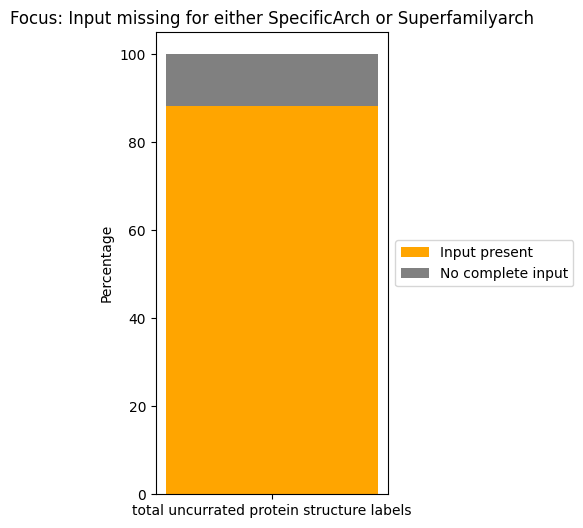

In [22]:
plt.figure(figsize=(3, 6))
bottom = 0
for value, color, label in zip(values, colors, labels):
    plt.bar('total uncurrated protein structure labels', value, bottom=bottom, color=color, label=label, width=0.5)
    bottom += value  # Update the starting position for the next section

# Adding labels and title
plt.ylabel('Percentage')
plt.title('Focus: Input missing for either SpecificArch or Superfamilyarch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Display the plot
plt.show()

## Input (SpecificArch and Superfamilyarch) in un-curated protein structres

In [23]:
df_UNcurfiltered = df_UNcur.dropna(subset=['superfamilyarch', 'SpecificArch'])

In [24]:
df_UNcurfiltered['superfamilyarch'] = df_UNcurfiltered['superfamilyarch'].astype(str).apply(lambda x: set(x.split(' ')))
df_UNcurfiltered['SpecificArch'] = df_UNcurfiltered['SpecificArch'].astype(str).apply(lambda x: set(x.split(' ')))

/var/folders/vr/c2p7rzwx4zjgs8gs2smwq6280000gp/T/ipykernel_44803/2536472403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UNcurfiltered['superfamilyarch'] = df_UNcurfiltered['superfamilyarch'].astype(str).apply(lambda x: set(x.split(' ')))
/var/folders/vr/c2p7rzwx4zjgs8gs2smwq6280000gp/T/ipykernel_44803/2536472403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UNcurfiltered['SpecificArch'] = df_UNcurfiltered['SpecificArch'].astype(str).apply(lambda x: set(x.split(' ')))


In [25]:
print(len(df_cur_simpl))
df_cur_simpl_filtered = df_cur_simpl.dropna(subset=['superfamilyarch', 'SpecificArch'])
print(len(df_cur_simpl_filtered))

42766
39584


In [26]:
df_cur_simpl['superfamilyarch'] = df_cur_simpl['superfamilyarch'].astype(str).apply(lambda x: set(x.split(' ')))
df_cur_simpl['SpecificArch'] = df_cur_simpl['SpecificArch'].astype(str).apply(lambda x: set(x.split(' ')))

Plotting for df_cur_simpl - SpecificArch


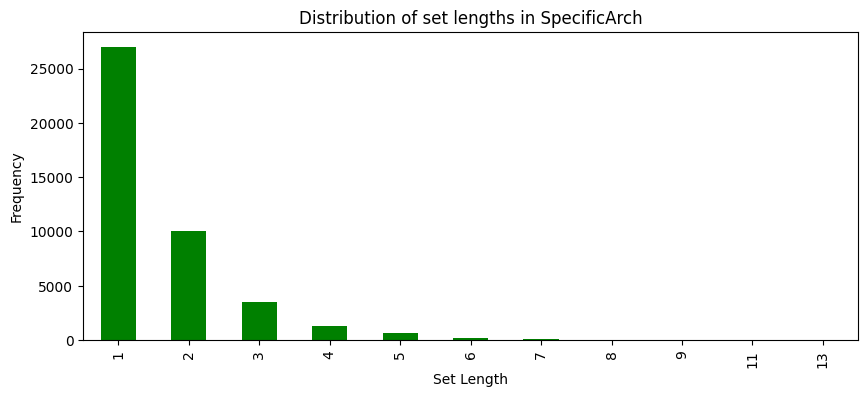

Plotting for df_cur_simpl - superfamilyarch


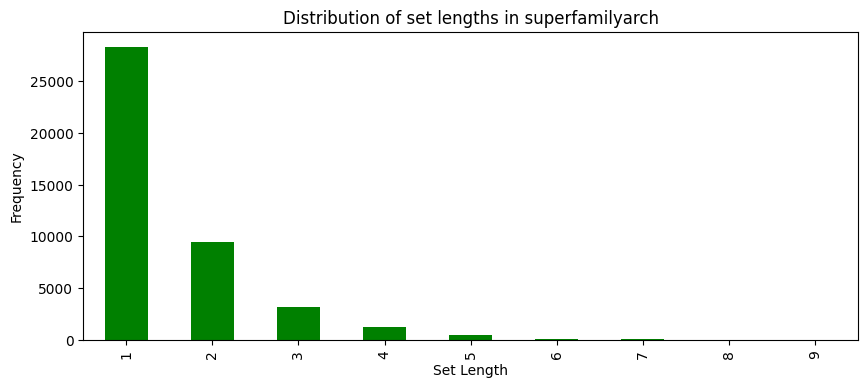

Plotting for df_UNcurfiltered - SpecificArch


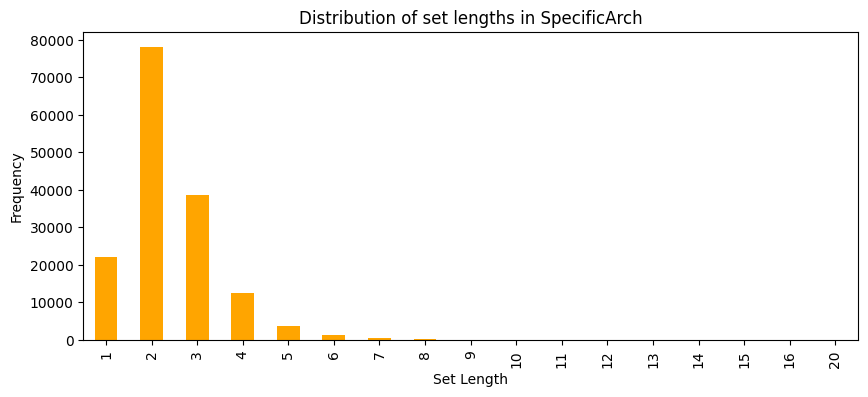

Plotting for df_UNcurfiltered - superfamilyarch


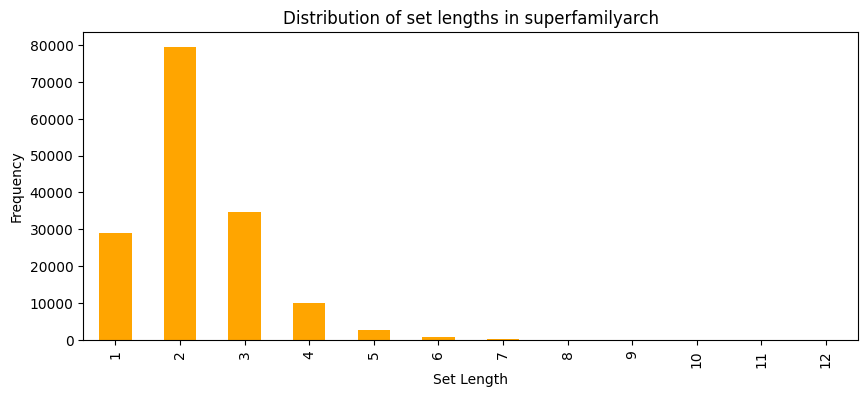

In [27]:
# List of column names to plot
columns_input = ['SpecificArch', 'superfamilyarch']

# Function to plot distribution of set lengths for a given DataFrame and column
def plot_set_length_distribution(df, column_name, color):
    # Calculate lengths of sets in the column
    lengths = df[column_name].apply(lambda x: len(x))
    
    # Get distribution of lengths
    length_distribution = lengths.value_counts().sort_index()
    
    # Plotting
    plt.figure(figsize=(10, 4))
    length_distribution.plot(kind='bar', color=color)
    plt.title(f'Distribution of set lengths in {column_name}')
    plt.xlabel('Set Length')
    plt.ylabel('Frequency')
    plt.show()


# Loop through each DataFrame and column to plot
for df_name, df, color in [('df_cur_simpl', df_cur_simpl, 'green'), ('df_UNcurfiltered', df_UNcurfiltered, 'orange')]:
    for column in columns_input:
        print(f'Plotting for {df_name} - {column}')
        plot_set_length_distribution(df, column, color)

Now we just check for those rows that have 1 entry and whether or not there are present in any the curated file (at least in combination with another domain). 

Column: SpecificArch
# of entries with just 1 entry:  22099
2961
19138


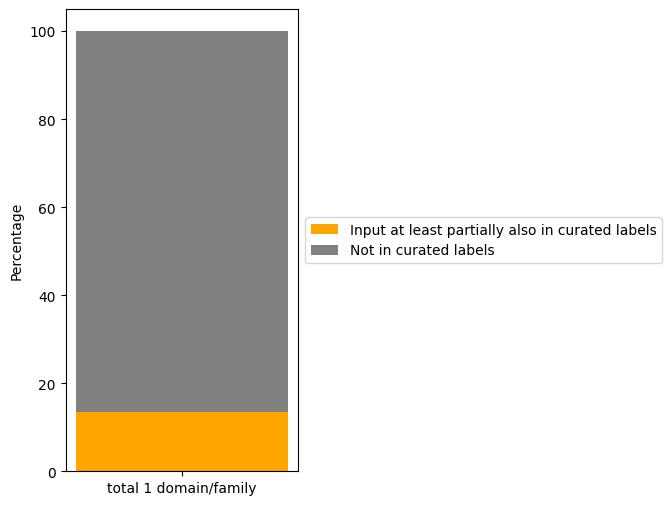

Percentage found in df_cur: 13.40%
Percentage not found in df_cur: 86.60%
Column: superfamilyarch
# of entries with just 1 entry:  29025
18969
10056


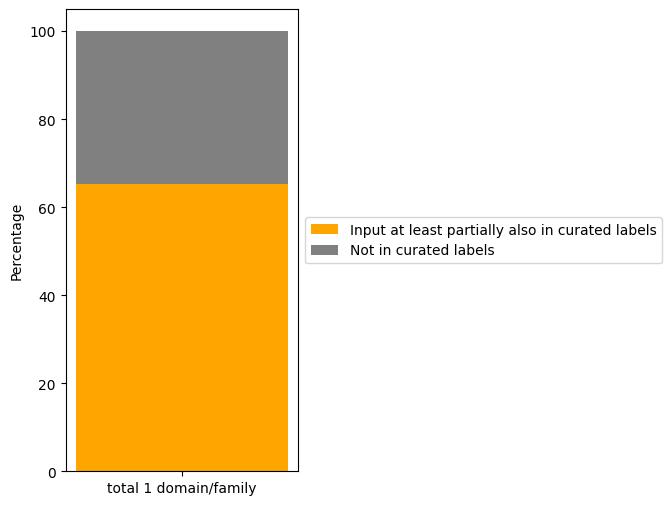

Percentage found in df_cur: 65.35%
Percentage not found in df_cur: 34.65%


In [32]:
# Function to filter DataFrame based on set length being 1 and calculate percentages
def calculate_presence_percentages(df_unfiltered, df_cur, column_name):
    print(f'Column: {column}')
    # Filter df_unfiltered to keep only rows with one entry in the column
    filtered_df = df_unfiltered[df_unfiltered[column_name].apply(lambda x: len(x) == 1)]
    print("# of entries with just 1 entry: ", len(filtered_df))
    # Flatten the sets in df_cur for easier comparison
    flattened_cur = set.union(*df_cur[column_name].dropna())
    
    # Check presence
    is_present = filtered_df[column_name].apply(lambda x: list(x)[0] in flattened_cur)
    not_present = filtered_df[column_name].apply(lambda x: list(x)[0] not in flattened_cur)
    print(is_present.sum())
    print(not_present.sum())
    # Calculate percentages
    present_percentage = (is_present.sum() / len(filtered_df)) * 100
    not_present_percentage = 100 - present_percentage

    labels = ['Input at least partially also in curated labels', 'Not in curated labels']
    colors = ['orange', 'grey']
    values = [present_percentage, not_present_percentage]

    plt.figure(figsize=(3, 6))
    bottom = 0
    for value, color, label in zip(values, colors, labels):
        plt.bar('total 1 domain/family', value, bottom=bottom, color=color, label=label, width=0.5)
        bottom += value  # Update the starting position for the next section

    # Adding labels and title
    plt.ylabel('Percentage')
    #plt.title('Focus: 1 value in Column', column_name, ' and if also present input of training (curated labels)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Display the plot
    plt.show()
    
    return present_percentage, not_present_percentage

# Applying the function for each column
for column in columns_input:
    present_percentage, not_present_percentage = calculate_presence_percentages(df_UNcurfiltered, df_cur_simpl, column)
    #print(f'Column: {column}')
    print(f'Percentage found in df_cur: {present_percentage:.2f}%')
    print(f'Percentage not found in df_cur: {not_present_percentage:.2f}%')

In [166]:
len(filtered_df_UNcurfiltered)

22077